In [15]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import json

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

import statsmodels.api as sm

In [16]:
# Load Dataset

df = pd.read_csv('./datasets/marketing_dataset.csv')

In [17]:
# Get descriptive statistics for the dataset

df.describe(include='all')

,TV,Radio,Social Media,Influencer,Sales
count,4562.000000,4568.000000,4566.000000,4572,4566.000000
unique,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,Mega,NaN
freq,NaN,NaN,NaN,1158,NaN
mean,54.066857,18.160356,3.323956,NaN,192.466602
std,26.125054,9.676958,2.212670,NaN,93.133092
min,10.000000,0.000684,0.000031,NaN,31.199409
25%,32.000000,10.525957,1.527849,NaN,112.322882
50%,53.000000,17.859513,3.055565,NaN,189.231172
75%,77.000000,25.649730,4.807558,NaN,272.507922


In [18]:
# Check for duplicates

df.duplicated().sum()

0

In [19]:
# Check for missing values

df.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [20]:
# Remove rows with missing values and check again

clean_df = df.dropna()

clean_df.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [21]:
# Rename columns to be a single word

clean_df = clean_df.rename(columns={'Social Media': 'Social_Media'})

clean_df.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

In [22]:
# Add a new column that sums the media spendings

clean_df['Media_Spendings'] = clean_df['TV'] + clean_df['Radio'] + clean_df['Social_Media']

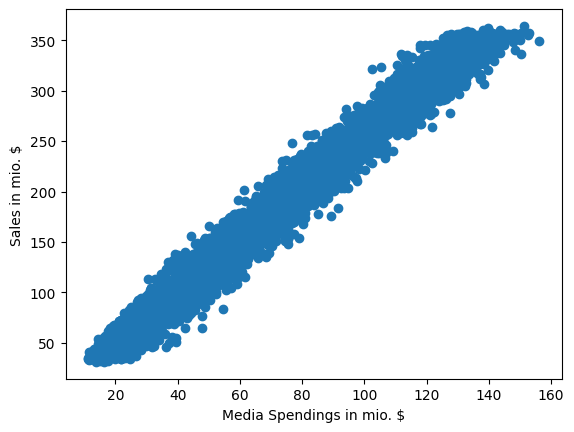

In [23]:
# Visualize TV spendings with Sales

plt.scatter(data=clean_df, x='Media_Spendings', y='Sales')
plt.xlabel('Media Spendings in mio. $')
plt.ylabel('Sales in mio. $')
plt.show()

In [24]:
# Create axis and sets

X = clean_df[['Media_Spendings']]
y = clean_df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random.randint(0, 100_000))

In [25]:
# Train the model

model = LinearRegression()
model.fit(X_train, y_train)

r_sq = model.score(X_train, y_train)

In [26]:
# Predict the model and visualize the results

y_pred_train = model.predict(X_test)

r_sq = r2_score(y_test, y_pred_train)
mae = mean_absolute_error(y_test, y_pred_train)
mse = mean_squared_error(y_test, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_train))

x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

In [27]:
# Check the coefficients

cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
cdf

,Coefficients
Media_Spendings,2.547069


In [28]:
# Predict sales for 10 mio. $ media spendings

sales = model.predict([[10]])
sales

c:\Users\Ben\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.45374292])

In [29]:
# Generate results and save them to a JSON file

result = {
    'data': clean_df.to_dict(),
    'context': 'The dataset contains information about the sales of a company based on the media spendings. The goal is to predict the sales based on the media spendings. The dataset has been cleaned and the model has been trained using a Linear Regression model. The model has been evaluated using the R2 score, Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error.',
    'metrics': {
        'Coefficients': cdf.to_dict()['Coefficients'],
        'R2': r_sq,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        "Reference": "Sales"
    }
}

with open('lr_spendings_sales_result.json', 'w') as file:
    file.write(json.dumps(result, indent=4))